# Missing value imputation: CategoricalImputer


CategoricalImputer performs imputation of categorical variables. It replaces missing values by an arbitrary label "Missing" (default) or any other label entered by the user. Alternatively, it imputes missing data with the most frequent category.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import CategoricalImputer

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# these are categorical variables with missing data

X_train[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.939335
MasVnrType    0.004892
dtype: float64

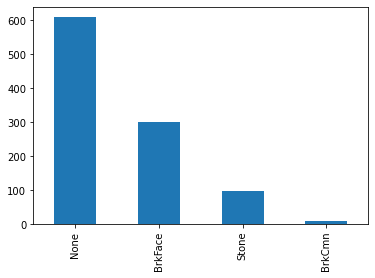

In [5]:
# number of observations per category

X_train['MasVnrType'].value_counts().plot.bar()

## Imputation with string missing

In [6]:
imputer = CategoricalImputer(
    imputation_method='missing',
    variables=['Alley', 'MasVnrType'])

imputer.fit(X_train)

CategoricalImputer(variables=['Alley', 'MasVnrType'])

In [7]:
# here we find the string that will be used for the imputation
imputer.fill_value

'Missing'

In [8]:
# same string for all variables

imputer.imputer_dict_

{'Alley': 'Missing', 'MasVnrType': 'Missing'}

In [9]:
# perform imputation

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

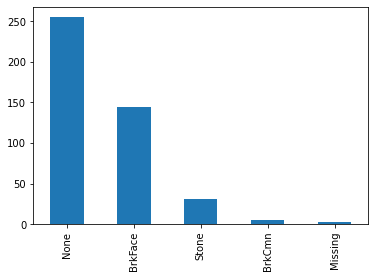

In [10]:
# we can observe in the below plot, the presence of a 
# new category, where before there were NA

test_t['MasVnrType'].value_counts().plot.bar()

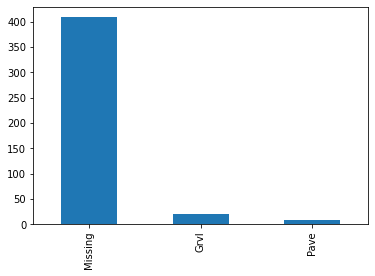

In [11]:
test_t['Alley'].value_counts().plot.bar()

## Frequent Category Imputation

We can also replace missing values with the most frequent category

In [12]:
imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=['Alley', 'MasVnrType'])

imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['Alley', 'MasVnrType'])

In [13]:
# in this attribute we find the most frequent category
# per variable to impute

imputer.imputer_dict_

{'Alley': 'Pave', 'MasVnrType': 'None'}

In [14]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# let's count the number of observations per category
# in the original train set

X_train['MasVnrType'].value_counts()

None       609
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

In [15]:
# note that we have a few more observations in the 
# most frequent category, which for this variable
# is 'None'

train_t['MasVnrType'].value_counts()

None       614
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

See how the number of observations for None in MasVnrType has increased from 609 to 614, thanks to replacing the NA with this label in the dataset.

## Automatically select categorical variables

When no variable list is passed when calling the imputer, all categorical variables will be selected by the imputer

In [16]:
# create an instance to impute all categorical variables
# with the most frequent category

imputer = CategoricalImputer(imputation_method='frequent')

# with fit, the transformer identifies the categorical variables
# in the train set
imputer.fit(X_train)

# here we find a dictionary with the categorical variables
# to imputation value: most frequent category
imputer.imputer_dict_

{'MSZoning': 'RL',
 'Street': 'Pave',
 'Alley': 'Pave',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'Utilities': 'AllPub',
 'LotConfig': 'Inside',
 'LandSlope': 'Gtl',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'None',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'CentralAir': 'Y',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'Gd',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'PavedDrive': 'Y',
 'PoolQC': 'Gd',
 'Fence': 'MnPrv',
 'MiscFeature': 'Shed',
 'SaleType': 'WD',
 'SaleCondition': 'Normal'}

In [17]:
# with transform we remove missing data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# missing values in categorical variables in original train set
X_train[imputer.variables].isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.939335
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.004892
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.023483
BsmtCond         0.023483
BsmtExposure     0.023483
BsmtFinType1     0.023483
BsmtFinType2     0.024462
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000978
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.467710
GarageType       0.052838
GarageFinish     0.052838
GarageQual       0.052838
GarageCond       0.052838
PavedDrive       0.000000
PoolQC      

In [18]:
# no NA after the imputation in the categorical variables
train_t[imputer.variables].isnull().mean()

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

## Impute with user defined string

The user can also enter a specific string for imputation (instead of the default 'Missing'

In [19]:
imputer = CategoricalImputer(variables='MasVnrType',fill_value="this_is_missing")

# we can fit and transform the train set
train_t = imputer.fit_transform(X_train)

# and then transform the test set
test_t = imputer.transform(X_test)

In [20]:
# the string to be used for the imputation
imputer.fill_value

'this_is_missing'

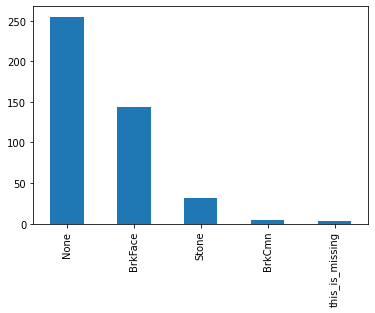

In [21]:
# after the imputation we see the new category

test_t['MasVnrType'].value_counts().plot.bar()

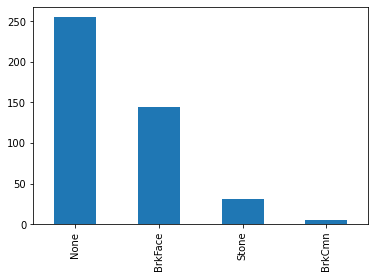

In [22]:
# which was not present in the original dataset

X_test['MasVnrType'].value_counts().plot.bar()